# Analysing Prices of Stocks Crypto-Currency (Bitcoin) and Bonds with Python

In [5]:
# Import the Neccesary packages and Libraries
import datetime
import numpy as np
import pandas_datareader.data as web
import yfinance as yfin
from IPython.display import VimeoVideo
yfin.pdr_override()

##Pull Equities Data from Amazon and Ford, along with Bitcoin Data
The following code pulls the last five years of equity price data from Ford and Amazon along with
the daily Bitcoin prices over the same time period. The reason we chose Ford and Amazon here is
to give examples from different sectors. While Amazon has been around for a while now, it still
represents a newer, popular tech stock while Ford is very much a part of the old guard, trading
publicly since 1956.

In [6]:
# start = datetime.date.today() - datetime.timedelta(days=5*365)
# end = datetime.date.today()
start = datetime.date(2016, 11, 16)
end = datetime.date(2021, 11, 19)
df = web.DataReader(["AMZN", "F", "BTC-USD"], start, end)["Adj Close"]
df["AMZN"] = 20 * df["AMZN"] # code adapted for recent AMZN stock split

[*********************100%***********************]  3 of 3 completed


## Taking a look at the data
Unless you’re extremely familiar with the dataset you’re working with, it’s always a good
idea to take a look at the first few rows of the data to get an idea on how it looks. We can
accomplish this using the head() method. You can pass a numerical parameter in this (for example,
10) and it will return the top 10 rows of the data set. By default, it returns the first five.

In [7]:
df.head(10)

,AMZN,BTC-USD,F
Date,,,
2016-11-16,746.490021,744.197998,8.860710
2016-11-17,756.399994,740.976990,8.764719
2016-11-18,760.159988,751.585022,8.683496
2016-11-19,NaN,751.616028,NaN
2016-11-20,NaN,731.026001,NaN
2016-11-21,780.000000,739.247986,8.705647
2016-11-22,785.329971,751.346985,8.779488
2016-11-23,780.120010,744.593994,8.786872
2016-11-24,NaN,740.289001,NaN


Right off the bat, we can see in Figure 1 that it was a smart idea to take a look at this data first.
Can you guess why we have null values here?
The answer is simple—equities only trade Monday through Friday, which means there’s no price
data available on the weekends. Bitcoin does not have this same characteristic as it trades seven
days a week, which is why 2016-11-19 and 2016-11-20 are populated in this case.

##Digging a little deeper into the data
We can use the pandas describe() method to show summary stats of our data. We can see that
Bitcoin has a much higher number of observations (count) than our two stocks, which, as just
discussed, is because of stocks not being traded on weekends. The other summary stats are relatively
basic, like mean and standard deviation along with showing minimum, maximum, and a
few quantiles. This might be something you are interested in, but it is hard to compare these
investments with this data alone since each asset had a different starting price five years ago. For
a better comparison, we will have to examine returns in more depth in an upcoming lesson.

In [8]:
df.describe()

,AMZN,BTC-USD,F
count,1261.000000,1829.000000,1261.000000
mean,2022.526539,14288.494413,8.737233
std,875.081737,16166.619474,2.166966
min,740.339966,731.026001,3.634793
25%,1427.050018,4610.479980,7.664959
50%,1812.969971,8269.809570,8.470904
75%,3078.099976,11790.916992,9.408668
max,3731.409912,67566.828125,18.264603


##Charting prices over 2020
If we ever want to get a quick plot of the DataFrame’s data, we can use the aptly named plot()
method. As shown below to chart the 2020 returns of these 3 assets. The code below code and chart demonstrate how we can easily pass in a date range to the plot method in
order to chart a subset of the data. If no date range is supplied, by default, the plot will encapsulate
the entire data set. Once again, the following chart illustrates why using price alone is not ideal
for comparing two assets. The scale of Bitcoin’s price versus a low-price stock like Ford makes it
very hard to compare the two when deciding which stock is better to invest in.

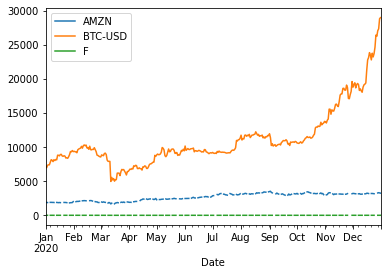

In [9]:
df["2020-01-01":"2020-12-31"].plot();

##Calculating Return on Investment
If we invested \$1,000 into each of these assets five years ago, how much money would we have
today? To answer this question, we first need to determine how many shares of each stock we
could buy with \$1,000 at the start of our date range. For the purposes of this exercise, we will
use 11/21/2016 as our starting point because it’s the first weekday of our data set.
From our data above, we can see the starting prices of AMZN, F, and Bitcoin were \$780, \$8.706,
and \$739.248 respectively. Now, we need to divide \$1,000 by each of these numbers to see how
many shares we will have:
AMZN = 1000/780 = 1.282 shares F = 1000/8.706 = 114.863 shares Bitcoin = 1000/739.248 =
1.353 shares It’s a relatively recent phenomenon that retail brokers offer fractional shares, but this
tends to be the case nowadays for most commonly used brokers. For this exercise, we will assume
we can have fractional shares.
Now, to determine how much money we would have today, we look at the most recent date in
our data set (11/18/2021), get the prices of each asset, and multiply our number of shares by this
number. We can find this by looking at the bottom of our data set in Figure 4 using the tail()
method:

In [10]:
np.round(df.tail(3), 3)

,AMZN,BTC-USD,F
Date,,,
2021-11-16,3540.70,60161.246,17.938
2021-11-17,3549.00,60368.012,18.092
2021-11-18,3696.06,56942.137,17.819


In [11]:
print("AMZN = ", 1.282 * 3696.06)
print("F = ", 114.863 * 17.82)
print("Bitcoin = ", 1.353 * 56942.14)

AMZN =  4738.34892
F =  2046.85866
Bitcoin =  77042.71542


From here, we can get our final asset values:

• AMZN = 1.282 * 3696.06 = \$4,738.35

• F = 114.863 * 17.82 = \$2,046.86

• Bitcoin = 1.353 * 56942.14 = \$77,042.72

Wow. All three of these assets have at least doubled the initial \$1,000 that was invested. Bitcoin
is clearly the standout asset in this case, turning \$1,000 into a whopping \$77,042.72. 

While Bitcoin clearly outperformed the other two assets over the last five years, past performance does not necessarily indicate future performance.
These assets were relatively easy to compare here since we started with \$1,000 in each. If we
had started with different values, we would need to calculate the returns for an apples-to-apples
comparison. In a future lesson, we will go over simple and log returns, but for the purpose of
simplicity, we will use simple returns:

Simple Returns Formula
3
𝑅𝑠𝑖𝑚𝑝𝑙𝑒 =
𝑝1 − 𝑝0
𝑝0
where 𝑝1 = final value, 𝑝0 = initial value
This will be easy in our case since $1,000 is the initial value in all three situations:

####• AMZN = (4738.35 - 1000)/1000 = 3.7384 = 373.84%

####• F = (2046.86 - 1000)/1000 = 1.0469 = 104.69%

####• Bitcoin = (77042.72 - 1000)/1000 = 76.04272 = 7,604.27%

Bitcoin’s return here is off the charts compared to the other two assets. Bitcoin is a relatively
new—some would even say riskier—asset than the other two. Higher risk equals higher potential
for rewards, and thus far, investing in Bitcoin has paid off handsomely.

## Comparing Equities and Bitcoin to Bonds
Let’s introduce one more asset class here—bonds. Bonds not only have the return of principal but they also return a coupon, usually annually or
quarterly. To simplify things, we will use an exchange traded fund (ETF), which tracks bonds.
The ETF is the Vanguard Long-Term Bond Index Fund ETF or BLV for short. This fund intends
to track the performance of the Bloomberg Barclays U.S. Long Government/Credit Float Adjusted
Index. This index includes investment grade corporate, U.S. government, and international dollardenominated
bonds that have maturities greater than 10 years. At least 80% of the fund’s total
assets will be invested in bonds held in the index mentioned above (Vanguard).
The following code snippet will pull BLV data and join it with our current DataFrame, df

In [12]:
df = df.join(web.DataReader(["BLV"], start, end)["Adj Close"])
df.rename(columns={"Adj Close": "BLV"}, inplace=True)

[*********************100%***********************]  1 of 1 completed


In [14]:
df.tail()

,AMZN,BTC-USD,F,BLV
Date,,,,
2021-11-14,NaN,65466.839844,NaN,NaN
2021-11-15,3545.679932,63557.871094,18.001741,97.257401
2021-11-16,3540.700073,60161.246094,17.938292,97.000603
2021-11-17,3548.999939,60368.011719,18.092382,97.656845
2021-11-18,3696.059875,56942.136719,17.819084,97.980217


##Calculate log returns, remove unused columns, and drop nulls 
BTC Trades 24/7/365 while the other assets trade only on business days. To successfully compare both assets, we must remove the nulls for the weekend dates. The code below does that.

In [15]:
df = df.dropna()
df["Amazon"] = np.log(df.AMZN) - np.log(df.AMZN.shift(1))
df["Ford"] = np.log(df.F) - np.log(df.F.shift(1))
df["Bitcoin"] = np.log(df["BTC-USD"]) - np.log(df["BTC-USD"].shift(1))
df = df.iloc[1:, 3:]

<ipython-input-15-32bb8a934a0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Amazon"] = np.log(df.AMZN) - np.log(df.AMZN.shift(1))
<ipython-input-15-32bb8a934a0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ford"] = np.log(df.F) - np.log(df.F.shift(1))
<ipython-input-15-32bb8a934a0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [16]:
df.head()

,BLV,Amazon,Ford,Bitcoin
Date,,,,
2016-11-17,69.089409,0.013188,-0.010892,-0.004338
2016-11-18,68.711052,0.004959,-0.009310,0.014215
2016-11-21,68.896362,0.025765,0.002548,-0.016551
2016-11-22,68.927254,0.006810,0.008446,0.016234
2016-11-23,68.680153,-0.006656,0.000841,-0.009028


##Show summary stats for the returns

In [17]:
df.describe()

,BLV,Amazon,Ford,Bitcoin
count,1260.000000,1260.000000,1260.000000,1260.000000
mean,83.763333,0.001270,0.000554,0.003442
std,11.471789,0.018430,0.022682,0.049623
min,67.842529,-0.082535,-0.116673,-0.464730
25%,73.256382,-0.007017,-0.009646,-0.016410
50%,78.793388,0.001525,0.000000,0.002848
75%,96.064381,0.010588,0.010146,0.025839
max,104.756859,0.124131,0.210596,0.225119


##Convert the Daily Returns to annualn returns

In [18]:
(df.describe()[["Bitcoin", "Ford"]])

,Bitcoin,Ford
count,1260.000000,1260.000000
mean,0.003442,0.000554
std,0.049623,0.022682
min,-0.464730,-0.116673
25%,-0.016410,-0.009646
50%,0.002848,0.000000
75%,0.025839,0.010146
max,0.225119,0.210596


In [21]:
((df[["Bitcoin", "Ford", "Amazon"]].mean() + 1).pow(365) - 1) * 100

Bitcoin    250.550839
Ford        22.425026
Amazon      58.898268
dtype: float64

We can run the same analysis on BLV as we did on the above stocks to get the total simple return
over a five-year period using a slightly different method. This time, we’ll calculate the simple return
and then just multiply that number by 1+ returnRate.

BLV 5 year return = (97.98-68.9)/68.9 = 0.422061 = 42.21%

If we started with \$1,000, after five years, we would’ve ended up with (1+0.422061) * 1000 =
\$1,422.06.

While this is still a positive return, it’s a much lower return than what we would’ve gotten with Ford,
Amazon, or Bitcoin. This is to be expected for the most part as bonds return a quarterly/annual
coupon along with returning the principal. For this reason, bonds (especially government bonds)
are considered safer assets than stocks or cryptocurrencies. One major thing to consider is if a
company goes bankrupt, you may not get your principal back in a bond. That being said, the
same goes for stocks. Bondholders also have less credit risk than stockholders: If you own a bond
in Ford and your friend owns Ford stock, but Ford declares bankruptcy tomorrow, the bondholder
will be paid off first in the bankruptcy proceedings and the equity owner will only get what’s left
over, making bonds a safer investment.
The downside to this is that it’s hard to achieve the level of total returns that a stock or cryptocurrency
can achieve with a bond. There is a risk-reward tradeoff. Comparing
a high-variance investment to a low-variance investment, what you choose is entirely up to your
risk preferences. Always take into consideration the risk-reward tradeoff.

Most investors hold a mix of stocks/cryptocurrencies and bonds. A rule of thumb that’s commonly
used to determine this mix is to subtract your age from 100; the resulting number is the percentage
of assets that should be in risky assets, like stocks. 

In other words, a 26-year-old should be putting
(100-26) = 74% of their assets in stocks and 26% in bonds. The reason for this is that, while you’re
young, you have more time to wait out the potential down cycles in a market so you can be riskier
with your money.